# Dados di√°rios de pre√ßos e demanda de eletricidade

Recentemente Portugal, Espanha e Fran√ßa tiveram problemas no fornecimento de energia el√©trica, ent√£o decidir trabalhar em um problema de tal caracter√≠stica.

N√£o encontrei um dataset a respeito dos tr√™s pa√≠ses sobre o respectivo assunto, ent√£o escolhi um semelhante, da Austr√°lia.

Esse problema de fornecimento de energia (sendo mais exato, a falta dele) tamb√©m j√° aconteceu aqui no Brasil em diferentes datas, sendo o mais recente e significativo, em 2020, no estado do Amap√°, que durou 22 dias.

O conjunto de dados abrange 2016 dias, entre 1¬∫ de janeiro de 2015 e 6 de outubro de 2020.

Dispon√≠vel em: https://www.kaggle.com/datasets/aramacus/electricity-demand-in-victoria-australia

## Caracter√≠sitcas do dataset

A seguir, o tipo e a descri√ß√£o de cada caracter√≠stica do dataset

- **date**: data e hora, a data da grava√ß√£o

- **demand**: float, uma demanda di√°ria total de eletricidade em MWh (Megawatt por hora)

- **RRP**: float, um pre√ßo de varejo recomendado em AUD$ / MWh

- **demand_pos_RRP**: float, uma demanda di√°ria total com RRP positivo em MWh

- **RRP_positive**: float, um RRP positivo m√©dio, ponderado pela demanda intradi√°ria correspondente em AUD$ / MWh

- **demand_neg_RRP**: float, uma demanda di√°ria total com RRP negativo em MWh

- **RRP_negative**: float, um RRP negativo m√©dio, ponderado pela demanda intradi√°ria correspondente em AUD$ / MWh

- **frac_at_neg_RRP**: float, uma fra√ß√£o do dia em que a demanda foi negociada com RRP negativo

- **min_temperature**: float, temperatura m√≠nima durante o dia em Celsius

- **max_temperature**: float, temperatura m√°xima durante o dia em Celsius

- **solar_exposure**: float, energia solar di√°ria total em MJ/m^2

- **rainfall**: float, precipita√ß√£o di√°ria em mm

- **school_day**: booleano, se os alunos estavam na escola naquele dia

- **holiday**: booleano, se o dia foi um feriado estadual ou nacional



## Interpretando o dataset

In [102]:
import pandas as pd
dataframe = pd.read_csv("electricity_price_demand.csv")

In [103]:
dataframe.head()

date      demand        RRP  demand_pos_RRP  RRP_positive  \
0  2015-01-01   99635.030  25.633696       97319.240     26.415953   
1  2015-01-02  129606.010  33.138988      121082.015     38.837661   
2  2015-01-03  142300.540  34.564855      142300.540     34.564855   
3  2015-01-04  104330.715  25.005560      104330.715     25.005560   
4  2015-01-05  118132.200  26.724176      118132.200     26.724176   

   demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
0        2315.790     -7.240000         0.020833             13.3   
1        8523.995    -47.809777         0.062500             15.4   
2           0.000      0.000000         0.000000             20.0   
3           0.000      0.000000         0.000000             16.3   
4           0.000      0.000000         0.000000             15.0   

   max_temperature  solar_exposure  rainfall school_day holiday  
0             26.9            23.6       0.0          N       Y  
1             38.8            26.8       0.0          N       N  
2             38.2            26.5       0.0          N       N  
3             21.4            25.2       4.2          N       N  
4             22.0            30.7       0.0          N       N

In [104]:
print(dataframe.shape)

(2106, 14)


## Visualizando a s√©rie temporal

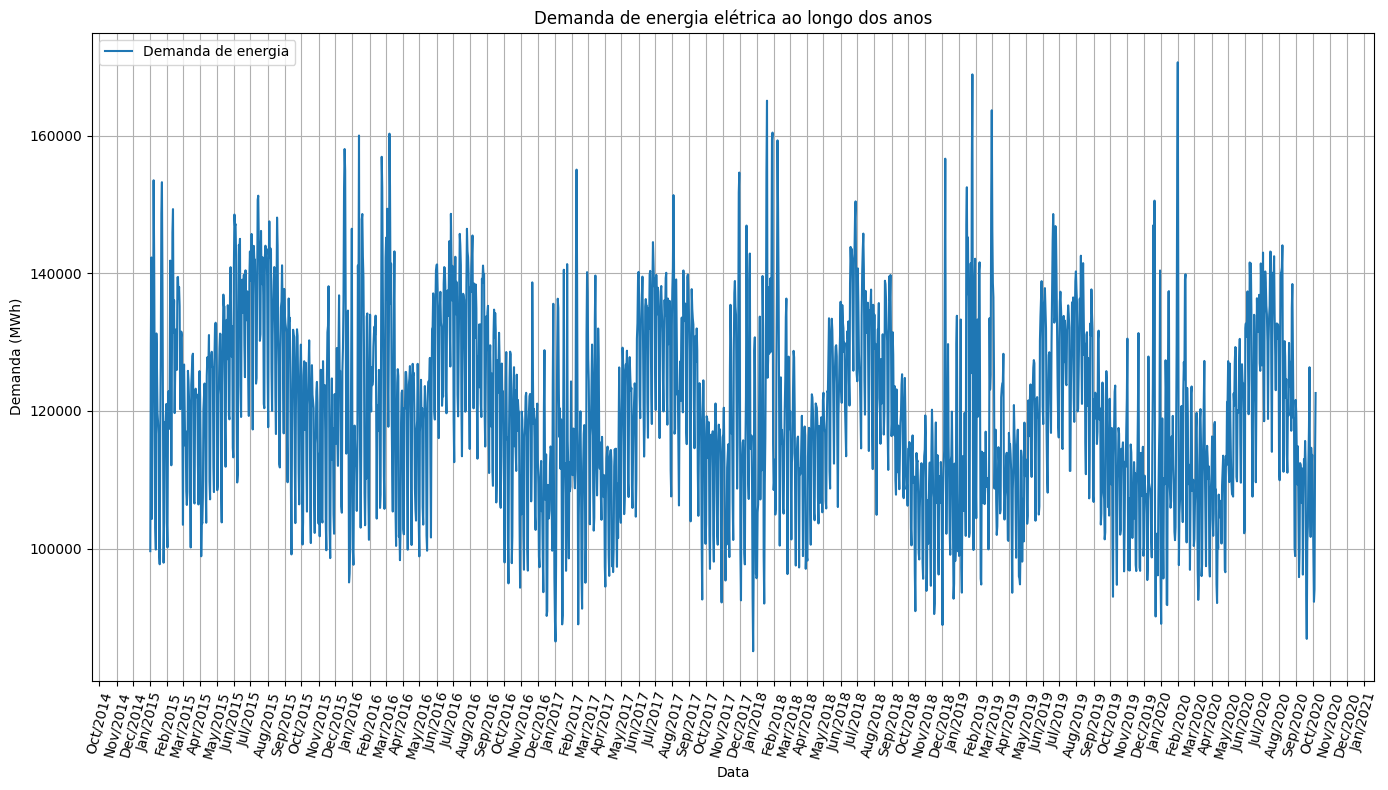

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convers√£o e ordena√ß√£o
dataframe['date_converted'] = pd.to_datetime(dataframe['date'])
dataframe = dataframe.sort_values('date')

# Plotar
plt.figure(figsize=(14, 8))
plt.plot(dataframe['date_converted'], dataframe['demand'], label='Demanda de energia')

# Mostrar m√™s/ano no eixo X
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y'))

plt.title('Demanda de energia el√©trica ao longo dos anos')
plt.xlabel('Data')
plt.ylabel('Demanda (MWh)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()


## Analisando e decompondo a s√©rie

Observando o gr√°fico da s√©rie temporal, temos como observar alguns padr√µes: Como por exemplo o pico de demanda no come√ßo, no meio e no fim do ano. Tendo tend√™ncia crescente at√© o meio do ano e decrescente do meio do ano at√© o fim (onde ocorre novamente um pico).

Nos dias que ocorrem baixa de demanda, s√£o os dias que n√£o possuem dias escolares ativos. 

Vamos decompor a s√©rie para analisar esses comportamentos.

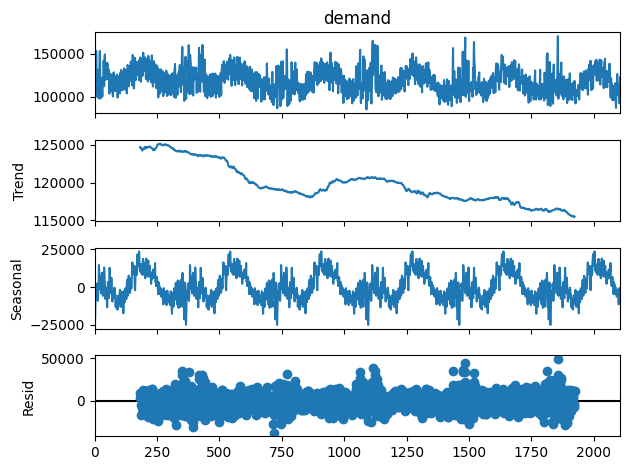

In [106]:
from statsmodels.tsa.seasonal import seasonal_decompose

series = dataframe['demand']
result = seasonal_decompose(series, model='additive', period=365)

result.plot()
plt.tight_layout()
plt.show()


Olhando para a decomposi√ß√£o da s√©rie, temos uma tend√™ncia (trend) de queda na demanda de energia el√©trica. Seria por conta de mudan√ßas de consumo? Efici√™ncia energ√©tica?

Olhanda para a sazonalidade da mesma, temos ciclos bem definidos na demanda de energia.

A respeito dos ru√≠dos, o modelo parece ter conseguido separar bem. Lembrando que no ano de 2020 aconteceu a pandemia, o que ocasionou nas medidas restritivas, como por exemplo, o fechamento de escolas etc. Isso parece n√£o impactar no gr√°fico, cujo o mesmo n√£o altera o comportamento como um todo, o que me faz pensar que os dias escolares n√£o √© o √∫nico motivo para os picos de demanda energ√©tica.


## Remo√ß√£o de tend√™ncia e sazonalidade

### Ajustando erro de index ocorido ao ajustar modelo ARIMA.

Como a seguir eu fa√ßo a diferencia√ß√£o das s√©ries (Tend√™ncia e Sazonalidade, decidir colocar o ajuste do index anterior √† isso).

In [107]:
# Ao ajustar o modelo ARIMA, tive problemas com index, ent√£o, tive que setar a coluna date como index do dataframe
dataframe['date'] = pd.to_datetime(dataframe['date'])
dataframe = dataframe.set_index('date')
dataframe = dataframe.asfreq('D')

### Tend√™ncia

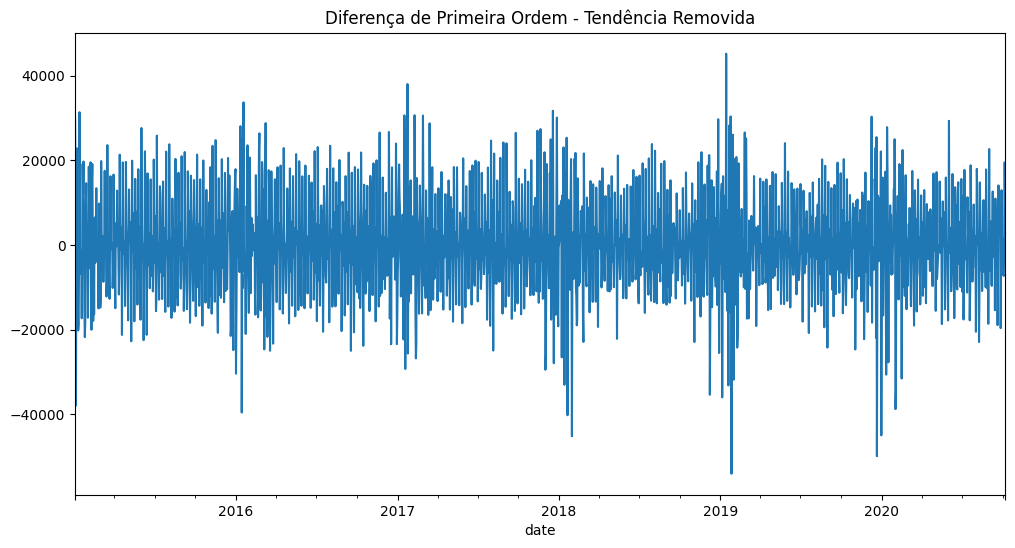

In [108]:
# A s√©rie original
# O .diff() faz a subtra√ß√£o entrar o valor atual e o anterior.
# O .dropna() apenas remover a primeira subtracao, dado que √© um NaN 
serie_diff1 = dataframe['demand'].diff().dropna()

serie_diff1.plot(figsize=(12, 6), title='Diferen√ßa de Primeira Ordem - Tend√™ncia Removida')
plt.show()

Observando a s√©rie sem tend√™ncia, vemos que a mesma varia em torno de 0, com alguns pontos extrapolando mas sem uma tend√™ncia de alta ou baixa ao longo do tempo.

### Sazonalidade

De forma analoga ao que fizemos anteriormente, vamos fazer para a sazonalidade.

A diferen√ßa √© que ao inv√©s de valores di√°rios, vamos calcular anualmente (365 dias).

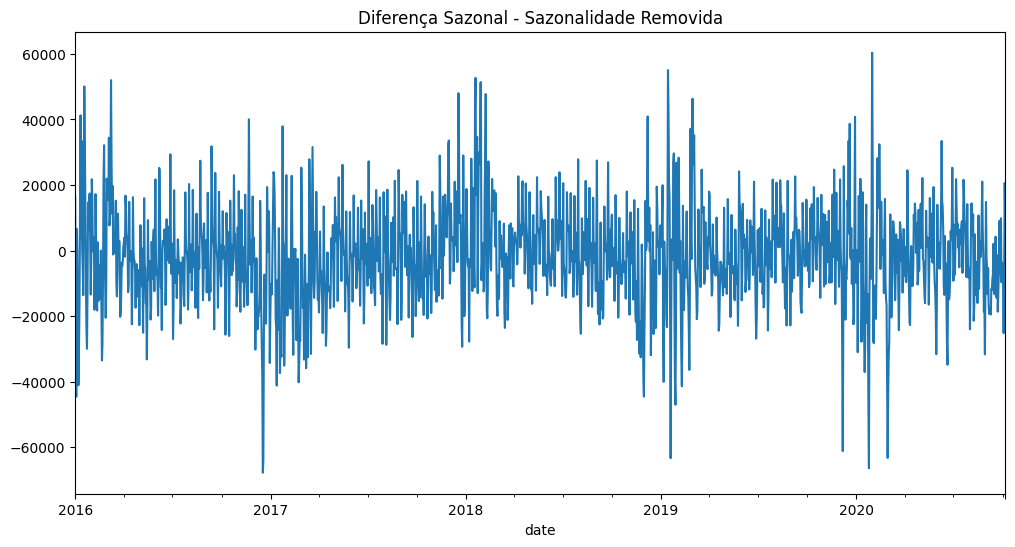

In [109]:
serie_diff_seasonal = dataframe['demand'].diff(365).dropna()

serie_diff_seasonal.plot(figsize=(12, 6), title='Diferen√ßa Sazonal - Sazonalidade Removida')
plt.show()

Observando o gr√°fico de diferen√ßa de sazonalidade, temos que os valores giram em torno de 0, por√©m com alguns picos.

Esses picos podem ser devido a outros fatores como datas comemorativas, esta√ß√£o do ano etc.

Mas o gr√°fico n√£o mostrar comportamento de alta ou baixa ao longo do tempo.

### Plotando a s√©rie sem tend√™ncia e sem sazonalidade

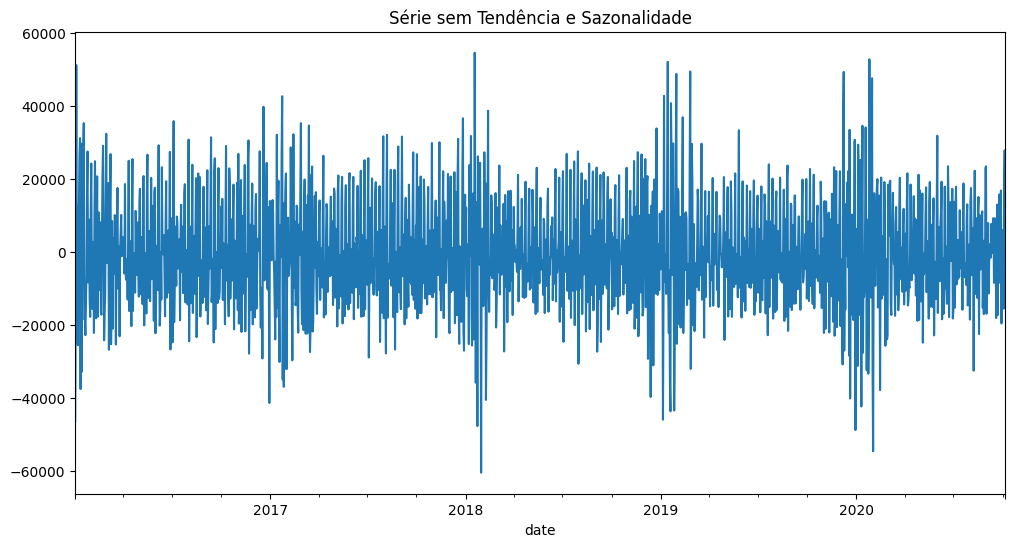

In [110]:
# Combinando os dois c√≥digos anteriores
serie_diff_combined = dataframe['demand'].diff().diff(365).dropna()

serie_diff_combined.plot(figsize=(12, 6), title='S√©rie sem Tend√™ncia e Sazonalidade')
plt.show()

Observando a combina√ß√£o de ambas as remo√ß√µes, temos que os valores continuam girando em torno de 0, ou seja, temos uma s√©rie estacion√°ria!

### Teste de uma s√©rie estacion√°ria

Para verificar se de fato temos uma s√©rie estacion√°ria, vamos aplicar o teste de Dicker-Fuller aumentado.

(Aqui eu tiver que ler com mais calma para compreender melhor o teste: https://support.minitab.com/pt-br/minitab/help-and-how-to/statistical-modeling/time-series/how-to/augmented-dickey-fuller-test/before-you-start/example/)

In [111]:
from statsmodels.tsa.stattools import adfuller

# s√©rie combinada criada anteriormente
result = adfuller(serie_diff_combined)

# Result √© uma tupla
print(f'Estat√≠stica ADF: {result[0]}')
print(f'Valor-p: {result[1]}')

if result[1] < 0.05:
    print("A s√©rie √© estacion√°ria.")
else:
    print("A s√©rie ainda n√£o √© estacion√°ria.")


Estat√≠stica ADF: -14.279753803850518
Valor-p: 1.330218317827445e-26
A s√©rie √© estacion√°ria.


Atrav√©s do teste podemos atestar que a s√©rie √© estacion√°ria, dado que o resultado do ADF foi menor que 0.05, ou seja, a s√©rie √© adequada para o modelo que vamos utilizar a seguir: O modelo ARIMA.

## Divis√£o dos dados e Modelagem

In [112]:
# Dividindo os dados
train_size = int(len(serie_diff_combined) * 0.8)
train = serie_diff_combined[:train_size]
test = serie_diff_combined[train_size:]

Como a s√©rie √© estacion√°ria, podemos plotar os gr√°ficos ACF e PACF para identificar a influ√™ncia de cada lag.

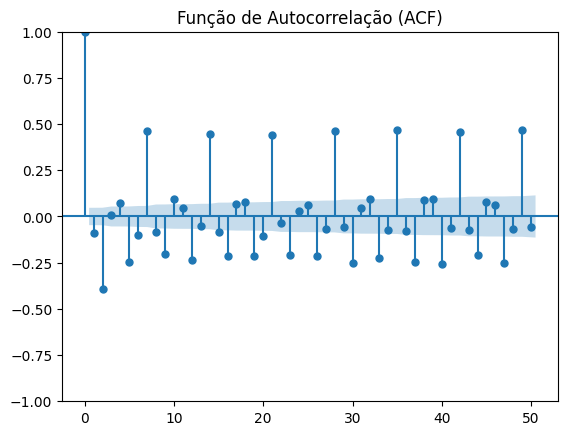

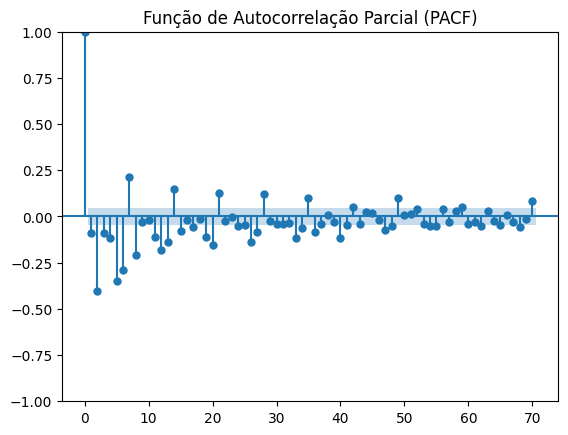

In [113]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plotar o gr√°fico ACF (Autocorrelation Function)
plot_acf(serie_diff_combined, lags=50)
plt.title('Fun√ß√£o de Autocorrela√ß√£o (ACF)')
plt.show()

# Plotar o gr√°fico PACF (Partial Autocorrelation Function)
plot_pacf(serie_diff_combined, lags=70)
plt.title('Fun√ß√£o de Autocorrela√ß√£o Parcial (PACF)')
plt.show()


Observando os gr√°ficos ACF e PACF, temos que:

No ACF a autocorrela√ß√£o come√ßa alta mas imediatamente cai para valores pr√≥ximos de 0, ap√≥s isso, ela fica variando para valores abaixo de 0 -> 0 -> Valores acima de 0. Mas sempre de 2 em 2, o que nos sugere um P = 2.

No PACF, o gr√°fico come√ßa muito alto, depois temos uma tend√™ncia abaixo de 0 e ap√≥s, uma tend√™ncia em torno de 0, variando tamb√©m a cada 2 lags, nos sugerindo um Q=2. No gr√°fico PACF eu aumentei o lag para 70, apenas para compreender melhor o comportamento.

Vamos utilizar o modelo AR e modelo ARIMA.

### Ajustando o modelo AR

In [125]:
################

### Ajustando o modelo ARIMA
auto-regressivo integrado de m√©dias m√≥veis

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

p = 2 # Gr√°fico ACF
d = 0 # J√° fizemos a diferencia√ß√£o da s√©rie
q = 2 # Gr√°fico PACF   
                                
model_arima = ARIMA(train, order=(p, d, q))
fit_arima = model_arima.fit()

# Resumo do modelo ajustado
print(fit_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                 demand   No. Observations:                 1392
Model:                 ARIMA(2, 0, 2)   Log Likelihood              -15065.684
Date:                Mon, 12 May 2025   AIC                          30143.369
Time:                        11:33:35   BIC                          30174.799
Sample:                    01-02-2016   HQIC                         30155.121
                         - 10-24-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.1669     12.032     -0.596      0.551     -30.749      16.415
ar.L1          0.1345      0.074      1.826      0.068      -0.010       0.279
ar.L2         -0.0496      0.049     -1.006      0.3

In [124]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

history = list(train)
predictions = []

for i in range(len(test)):
    model = ARIMA(history, order=(p,d,q))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test.iloc[i])

# Avalia√ß√£o

#  Erro Quadr√°tico M√©dio (EQM)
eqm = mean_squared_error(test, predictions)

# Erro Absoluto M√©dio (MAE)
mae = mean_absolute_error(test, predictions)

# Erro Percentual Absoluto M√©dio (MAPE)
mape = mean_absolute_percentage_error(test, predictions)

rmse = np.sqrt(eqm)
print(f"üîÅ Previs√£o 1 passo: RMSE = {rmse:.2f}, MAE = {mae:.2f}, MAPE = {mape:.2f}")


üîÅ Previs√£o 1 passo: RMSE = 12947.71, MAE = 9947.13, MAPE = 2.31
